# Fundementals of Data Analysis Practical Assignment Anscombes Quartet

Anscombes Quartet demonstates the danger in summary statistics and why it always a good idea to plot your data It comprises of a table of four datasets of apparently similar data.

Conveniently, the Python graphing package Seaborn has Anscombes Quartet in it's library of datasets by default.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
# Load the example dataset for Anscombe's quartet
anscombedf = sns.load_dataset("anscombe")

print(anscombedf)

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

In [3]:
anscombedf.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


Corrolation matrix

In [4]:
anscombedf.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


Covariance Matrix

In [5]:
anscombedf.cov()

,x,y
x,10.232558,5.115581
y,5.115581,3.837388


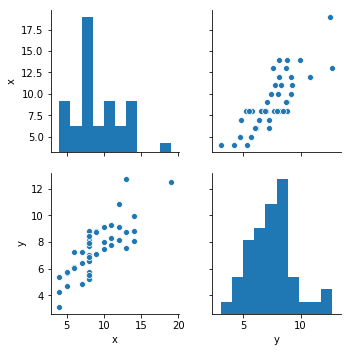

In [6]:
anspairplot = sns.pairplot(anscombedf)
plt.show(anspairplot)

Performing linear regression on dataset.

In [18]:
lrX = anscombedf["x"]
lrY = anscombedf["y"]
lm = linear_model.LinearRegression()
model = lm.fit(lrX,lrY)
predictions = lm.predict(lrX)
print(predictions)[0:5]

ValueError: Expected 2D array, got 1D array instead:
array=[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5. 10.  8. 13.  9. 11. 14.  6.
  4. 12.  7.  5. 10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.  8.  8.  8.
  8.  8.  8.  8. 19.  8.  8.  8.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Set the "dataset" column as the index to allow for creation of subset dataframes.

In [8]:
anscombedf.set_index("dataset", inplace=True)
print(anscombedf)

            x      y
dataset             
I        10.0   8.04
I         8.0   6.95
I        13.0   7.58
I         9.0   8.81
I        11.0   8.33
I        14.0   9.96
I         6.0   7.24
I         4.0   4.26
I        12.0  10.84
I         7.0   4.82
I         5.0   5.68
II       10.0   9.14
II        8.0   8.14
II       13.0   8.74
II        9.0   8.77
II       11.0   9.26
II       14.0   8.10
II        6.0   6.13
II        4.0   3.10
II       12.0   9.13
II        7.0   7.26
II        5.0   4.74
III      10.0   7.46
III       8.0   6.77
III      13.0  12.74
III       9.0   7.11
III      11.0   7.81
III      14.0   8.84
III       6.0   6.08
III       4.0   5.39
III      12.0   8.15
III       7.0   6.42
III       5.0   5.73
IV        8.0   6.58
IV        8.0   5.76
IV        8.0   7.71
IV        8.0   8.84
IV        8.0   8.47
IV        8.0   7.04
IV        8.0   5.25
IV       19.0  12.50
IV        8.0   5.56
IV        8.0   7.91
IV        8.0   6.89


Group into invidual datasheet based on dataset column values.

In [9]:
Idf = anscombedf.loc["I"]
IIdf = anscombedf.loc["II"]
IIIdf = anscombedf.loc["III"]
IVdf = anscombedf.loc["IV"]

Display tables side by side. Function taken from: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

In [10]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [11]:
display_side_by_side(Idf,IIdf,IIIdf,IVdf)

,x,y
dataset,,
I,10.0,8.04
I,8.0,6.95
I,13.0,7.58
I,9.0,8.81
I,11.0,8.33
I,14.0,9.96
I,6.0,7.24
I,4.0,4.26
I,12.0,10.84


Show summary statistics for each subset dataframe and compare and contrast.

In [12]:
display_side_by_side(Idf.describe(),IIdf.describe(),IIIdf.describe(),IVdf.describe())

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000
,x,y
count,11.000000,11.000000


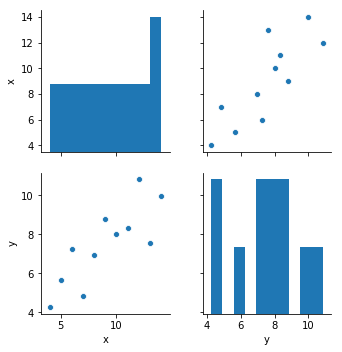

In [13]:
Idfpairplot = sns.pairplot(Idf)
plt.show(Idfpairplot)

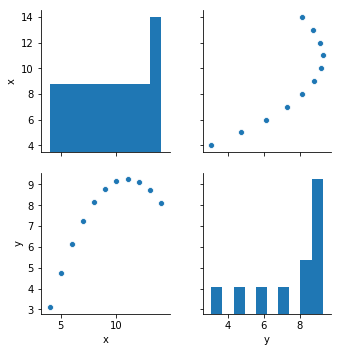

In [14]:
IIdfpairplot = sns.pairplot(IIdf)
plt.show(IIdfpairplot)

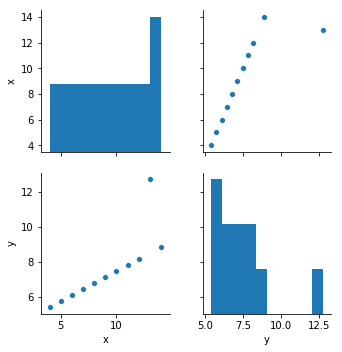

In [15]:
IIIdfpairplot = sns.pairplot(IIIdf)
plt.show(IIIdfpairplot)

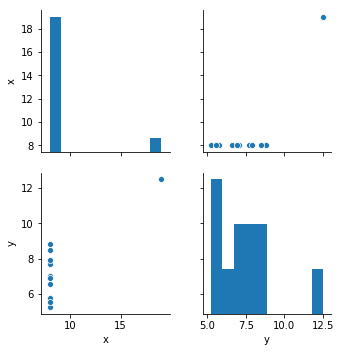

In [16]:
IVdfpairplot = sns.pairplot(IVdf)
plt.show(IVdfpairplot)

In [17]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombedf,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

KeyError: "['dataset'] not in index"